In [1]:
import sys
import pickle
sys.path.append('../..')
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from lstm import transf_chik_pred
from lstm import apply_dengue_chik
from preprocessing import get_nn_data
from lstm import build_model, transf_chik_pred, transf_model
from pgbm_model import  cross_dengue_chik_prediction
from sklearn.metrics import mean_squared_error as mse 
import matplotlib.dates as mdates
from plots_pgbm import predicted_vs_observed as p_o_pgbm
from plots_lstm import plot_loss
fmt = mdates.DateFormatter('%d-%b\n%Y')

In [2]:
CITY = 2507507
CITY_NAME = 'João Pessoa'
STATE = 'PB'
FILENAME_DATA = f'../../data/chik_{CITY}_cluster.csv'

In [3]:
df_chik = pd.read_csv(FILENAME_DATA, index_col = 'Unnamed: 0' )
df_chik.index = pd.to_datetime(df_chik.index)
df_chik

,casos_2511103,casos_est_2511103,casos_est_min_2511103,casos_est_max_2511103,p_rt1_2511103,p_inc100k_2511103,temp_min_2511103,temp_max_2511103,umid_min_2511103,pressao_min_2511103,...,casos_2502151,casos_est_2502151,casos_est_min_2502151,casos_est_max_2502151,p_rt1_2502151,p_inc100k_2502151,temp_min_2502151,temp_max_2502151,umid_min_2502151,pressao_min_2502151
2010-01-03,0,0.0,0,0,0.000000,0.00000,21.729566,31.557818,46.931300,0.996315,...,0,0.0,0,0,0.0,0.0,21.738957,31.729963,46.241944,0.996288
2010-01-10,0,0.0,0,0,0.000000,0.00000,21.281668,30.062966,50.423419,0.997110,...,0,0.0,0,0,0.0,0.0,21.265948,30.022478,50.350168,0.997178
2010-01-17,0,0.0,0,0,0.000000,0.00000,21.253671,31.024864,46.237324,0.998092,...,0,0.0,0,0,0.0,0.0,21.469417,30.848798,47.002854,0.998225
2010-01-24,0,0.0,0,0,0.000000,0.00000,21.149841,29.572065,59.198893,0.997034,...,0,0.0,0,0,0.0,0.0,21.279423,29.891706,57.686070,0.997251
2010-01-31,0,0.0,0,0,0.000000,0.00000,22.371983,31.128226,51.700630,0.995794,...,0,0.0,0,0,0.0,0.0,22.304238,31.093772,52.040264,0.996023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-19,0,0.0,0,0,0.000000,0.00000,21.834682,29.008676,56.809096,0.997182,...,0,0.0,0,0,0.0,0.0,21.913404,29.877729,52.756304,0.996908
2023-03-26,0,0.0,0,0,0.000000,0.00000,21.220830,29.040907,58.946110,0.997985,...,0,0.0,0,0,0.0,0.0,21.380293,29.182652,58.818106,0.998025
2023-04-02,2,2.0,2,2,0.977033,25.31966,20.860038,29.169460,57.238036,0.997669,...,0,0.0,0,0,0.0,0.0,20.986542,29.398860,55.340006,0.997911
2023-04-09,1,1.0,1,1,0.688693,12.65983,21.344979,29.065552,60.965549,0.996402,...,0,0.0,0,0,0.0,0.0,21.661068,29.409720,56.815284,0.996388


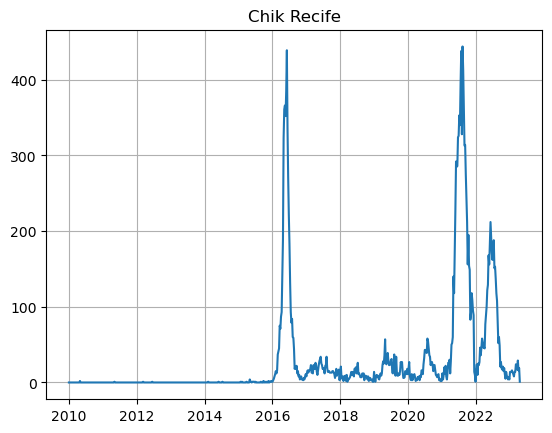

In [4]:
fig, ax = plt.subplots()

ax.plot(df_chik[f'casos_2507507'])

ax.set_title('Chik Recife')
plt.grid()
plt.show()

In [5]:
INI_DATE = '2015-12-01'
END_DATE_TRAIN = '2016-12-01'
END_DATE = '2023-01-01'

PREDICT_N = 4 # number of new days predicted
LOOK_BACK = 4 # number of last days used to make the prediction 
EPOCHS = 400
HIDDEN = 8
FEAT = 140 # number of features 


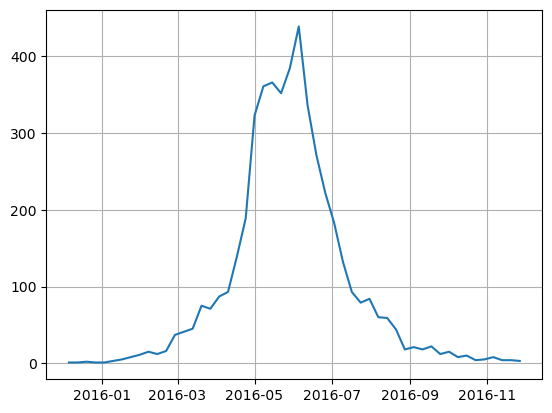

In [6]:
fig, ax = plt.subplots()

ax.plot(df_chik.loc[INI_DATE:END_DATE_TRAIN]['casos_2507507'])

ax.grid()

plt.show()

Apply the dengue model:

2023-05-07 00:13:31.545255: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


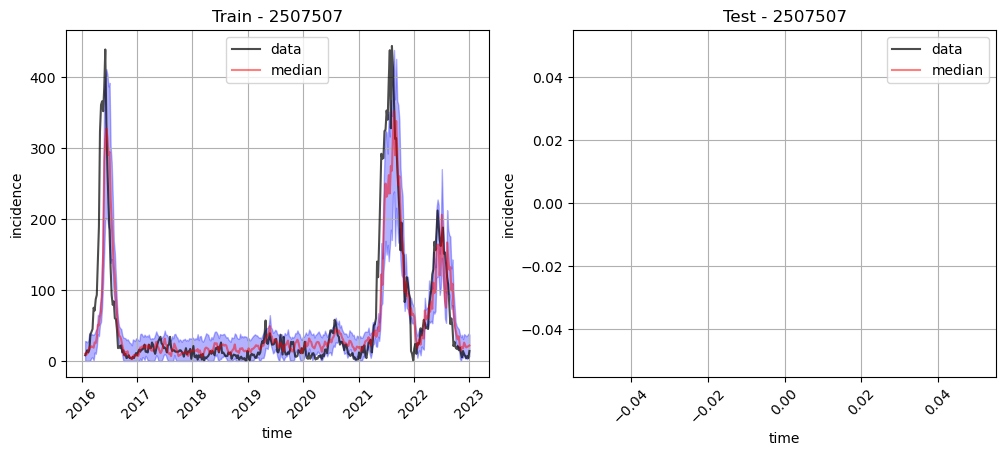

In [7]:
metrics = apply_dengue_chik(CITY, ini_date = INI_DATE, 
                         end_date = END_DATE, look_back = LOOK_BACK, batch_size = 1, 
                         predict_n = PREDICT_N,  label_m = f'msle_all', filename = FILENAME_DATA  )



Applying the **transfer learning** techinique:

- Using the model trained with `loss = 'msle'`:


Compilation Time :  0.0018911361694335938
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4, 140)]          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 4, 8)             9536      
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 4, 8)              0         
                                                                 
 lstm_1 (LSTM)               (None, 8)                 544       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense (Dense)               (None, 4)                 36        
                   

40/40 [==============================] - 0s 5ms/step - loss: 0.0043 - accuracy: 0.6750 - mape: 87.8867 - mse: 0.0086 - val_loss: 0.0046 - val_accuracy: 0.6000 - val_mape: 34.4687 - val_mse: 0.0121
Epoch 34/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0039 - accuracy: 0.6750 - mape: 55.6912 - mse: 0.0072 - val_loss: 0.0043 - val_accuracy: 0.6000 - val_mape: 53.4352 - val_mse: 0.0110
Epoch 35/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0039 - accuracy: 0.7250 - mape: 84.0934 - mse: 0.0072 - val_loss: 0.0131 - val_accuracy: 0.6000 - val_mape: 42.2862 - val_mse: 0.0349
Epoch 36/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 0.6750 - mape: 90.0879 - mse: 0.0058 - val_loss: 0.0121 - val_accuracy: 0.4000 - val_mape: 31.5191 - val_mse: 0.0323
Epoch 37/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 0.6500 - mape: 66.1203 - mse: 0.0064 - val_loss: 0.0027 - val_accuracy: 0.6000 -

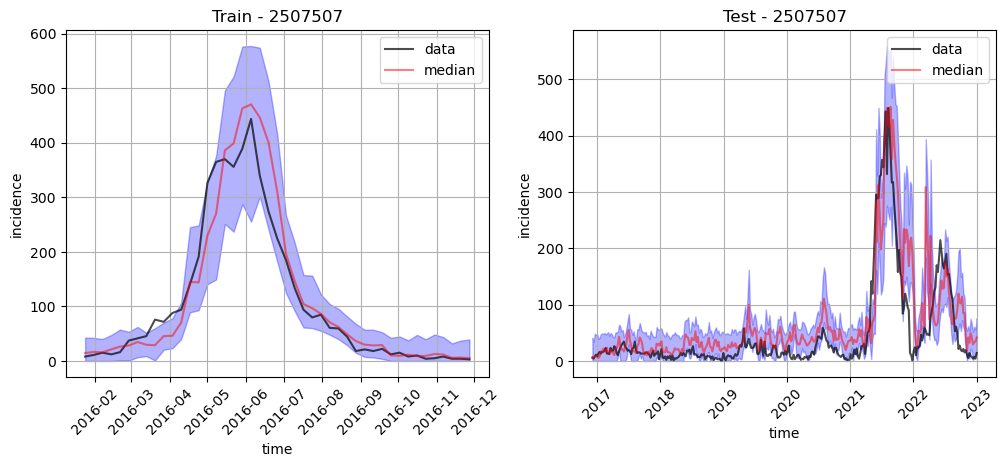

In [8]:

l1 = 1e-6
l2 = 1e-6
BATCH_SIZE = 1
EPOCHS = 100
filename = f'../../saved_models/lstm/trained_{CITY}_model_msle_all.h5'
model = transf_model(filename, l1,l2,HIDDEN, FEAT, PREDICT_N, LOOK_BACK, batch_size = BATCH_SIZE, lr = 0.001)
    
m_msle, hist, m_t, m_val = transf_chik_pred(model, CITY, ini_date = INI_DATE, end_train_date = END_DATE_TRAIN,  
                                end_date = END_DATE,  epochs= EPOCHS, 
                                predict_n = PREDICT_N, look_back = LOOK_BACK, validation_split = 0.1, monitor = 'val_loss', patience = 20, 
                                label = f'transf_msle', filename_data = FILENAME_DATA,  )

Apply the pgbm model:

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


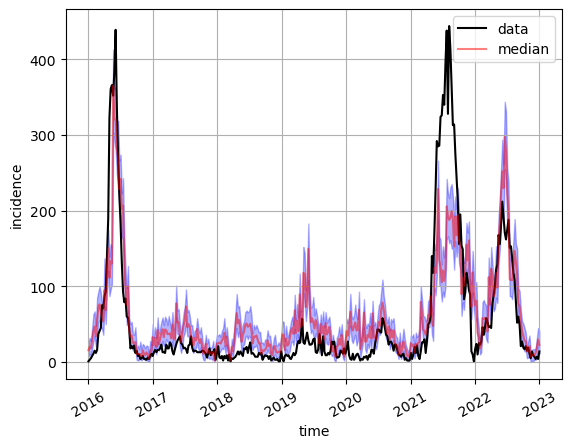

In [9]:
preds, preds25, preds975, X_data, targets = cross_dengue_chik_prediction(CITY, STATE, predict_n = PREDICT_N, look_back = LOOK_BACK, ini_date = INI_DATE, end_date = END_DATE, filename = FILENAME_DATA )
    